# Python aplicado a Big Data
## Dia 8 - 15/03/2021
### Instrutor: Leonardo Galler

# Introducao a NLP

##  Leitura de arquivo

In [1]:
# Se não estiver instalado utilize esta célula para instalar
## Se estiver utilizando Conda
#import sys
#!conda install --yes --prefix {sys.prefix} matplotlib

In [2]:
import os
import nltk

#### 2 formas de leitura
1. Arquivo no mesmo diretório do notebook
2. Arquivo em um diretório diferente

In [1]:
# Fazendo a leitura de um arquivo de texto no mesmo diretório
with open("netflix_titles.csv", "r") as f:
    text = f.read()
    print(text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Fazendo a leitura de um arquivo de texto em um diretório diferente
with open(os.path.join("data","frases.txt"), "r") as f:
    text = f.read()
    print(text)

## Tabulando um arquivo

In [4]:
# Podemos usar o o pandas para tabular um arquivo
import pandas as pd

In [36]:
# Extrai coluna de texto do dataframe
df = pd.read_csv("netflix_titles.csv")
print(df.columns)
print()
# Converte o texto em lowercase
df['description'] = df['description'].str.lower()
df['description']

# Criando um novo dataframe usando o titulo como indice
df_desc = df[['title','description']]
print(df_desc.info())
print()

df_desc_treat = df_desc[df_desc['description'].notnull()]
print(df_desc_treat.info())

# acessando por coluna
#resultado = df.head()[['director', 'title']]
#print(resultado)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7787 non-null   object
 1   description  7787 non-null   object
dtypes: object(2)
memory usage: 121.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7786
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7787 non-null   object
 1   description  7787 non-null   object
dtypes: object(2)
memory usage: 182.5+ KB
None


# Explorando Distribuição de Frequência em Dados de Chat

In [37]:
# Imports
import nltk

[('Movie', 5377), ('TV Show', 2410)]


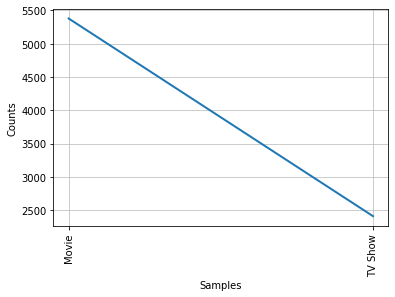

In [54]:
# Distribuição de frequência de um único arquivo
fdist = nltk.FreqDist(df['type'])
fdist.keys()
fdist.values()
print(fdist.most_common(10))
fdist.N()
fdist.plot()

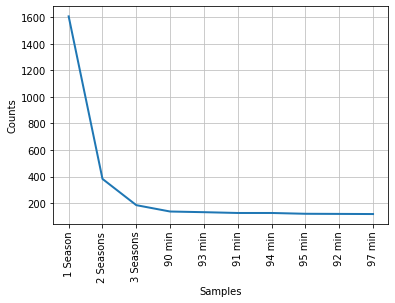

In [55]:
fdist2 = nltk.FreqDist(df['duration'])
fdist2.keys()
fdist2.values()
fdist2.most_common(10)
fdist2.N()
fdist2.plot(10)

In [56]:
# Report, vc entendera melhor sobre tokens logo abaixo
print('\nContagem do número máximo de ocorrências do token "',fdist2.max(),'" : ', fdist[fdist2.max()])
print('\nNúmero total de tokens distintos : ', fdist2.N())
print('\nA seguir estão os 10 tokens mais comuns')
print(fdist2.most_common(10))
print("\n")


Contagem do número máximo de ocorrências do token " 1 Season " :  0

Número total de tokens distintos :  7787

A seguir estão os 10 tokens mais comuns
[('1 Season', 1608), ('2 Seasons', 382), ('3 Seasons', 184), ('90 min', 136), ('93 min', 131), ('91 min', 125), ('94 min', 125), ('95 min', 119), ('92 min', 118), ('97 min', 117)]




# Tokenization
## Processo de dividir uma string em listas de pedaços ou "tokens". 
## Um token é uma parte inteira. Por exemplo: uma palavra é um token em uma sentença. Uma sentença é um token em um parágrafo.



In [57]:
# Imports
from nltk.tokenize import sent_tokenize, word_tokenize

In [59]:
# Tokenization em sentenças
sent_tokens = sent_tokenize(df_desc_treat['description'][0])
print(sent_tokens)

['in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.']


In [60]:
# Tokenization em palavras
word_tokens = word_tokenize(df_desc_treat['description'][0])
print(word_tokens)

['in', 'a', 'future', 'where', 'the', 'elite', 'inhabit', 'an', 'island', 'paradise', 'far', 'from', 'the', 'crowded', 'slums', ',', 'you', 'get', 'one', 'chance', 'to', 'join', 'the', '3', '%', 'saved', 'from', 'squalor', '.']


# Remoção de Stopwords

### Stopwords são palavras comuns que normalmente não contribuem para o significado de uma frase, pelo menos com relação ao propósito da 
### informação e do processamento da linguagem natural. São palavras como "The" e "a" ((em inglês) ou "O/A" e "Um/Uma" ((em português). 
### Muitos mecanismos de busca filtram estas palavras (stopwords), como forma de economizar espaço em seus índices de pesquisa.



In [63]:
# Imports
from nltk.corpus import stopwords

In [71]:
# Stop words em inglês
english_stops = set(stopwords.words('english'))

set

In [77]:
english_stops.add('.')
english_stops

{'',
 ',',
 '.',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'o

In [78]:
# Lista de palavras
words = word_tokenize(df_desc_treat['description'][0])
words

['in',
 'a',
 'future',
 'where',
 'the',
 'elite',
 'inhabit',
 'an',
 'island',
 'paradise',
 'far',
 'from',
 'the',
 'crowded',
 'slums',
 ',',
 'you',
 'get',
 'one',
 'chance',
 'to',
 'join',
 'the',
 '3',
 '%',
 'saved',
 'from',
 'squalor',
 '.']

In [83]:
# List comprehension para aplicar as english_stop words a lista de palavras
lista_pal_indice_0 = [word for word in words if word not in english_stops]

# Lemmatization

#### Lemmatização na linguística, é o processo de agrupar as diferentes formas flexionadas de uma palavra para que possam ser analisadas como um único item.
#### Na linguística computacional, a Lemmatização é o processo algorítmico de determinação do lema para uma determinada palavra. 
#### Uma vez que o processo pode envolver tarefas complexas, como entender o contexto e determinar a parte da fala de uma palavra em uma frase 
#### (requerendo, por exemplo, conhecimento da gramática de uma linguagem), pode ser uma tarefa difícil implementar um lematizador para uma nova língua.

#### Em muitas línguas, as palavras aparecem em várias formas inflexíveis. 
#### Por exemplo, em inglês, o verbo 'to walk' pode aparecer como 'walk', 'walk', 'walkks', 'walking'. 
#### A forma base, 'walk', que se poderia procurar em um dicionário, é chamado de lema para a palavra. 
#### A combinação da forma base com a parte da fala geralmente é chamada de lexema da palavra.

#### A Lemmatização está intimamente relacionada com o Stemming. 
#### A diferença é que um stemmer opera em uma única palavra sem conhecimento do contexto e, portanto, não pode discriminar entre palavras 
#### que têm diferentes significados, dependendo da parte da fala. No entanto, os stemmers são geralmente mais fáceis de implementar e executar mais 
#### rapidamente, e a precisão reduzida pode não ser importante para algumas aplicações.

#### Stemming e Lemmatization são operações parecidas. A principal diferença entre eles é que o Stemmning pode gerar palavras geralmente inexistentes, 
#### enquanto as lemas são palavras reais.

#### Assim, sua root stem pode não ser algo que você pode procurar em um dicionário, mas você pode procurar um lema. 
#### Algumas vezes você terminará com uma palavra muito semelhante, mas as vezes, você terminará com uma palavra completamente diferente. Vamos ver alguns exemplos.

In [81]:
# Imports
import nltk
from nltk.stem import WordNetLemmatizer

In [82]:
# Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [86]:
# pos = v
print(lista_pal_indice_0)
print()
for i in lista_pal_indice_0:
    print(wordnet_lemmatizer.lemmatize(i, pos='v'))

['future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slums', 'get', 'one', 'chance', 'join', '3', '%', 'saved', 'squalor']

future
elite
inhabit
island
paradise
far
crowd
slum
get
one
chance
join
3
%
save
squalor
